In [1]:
# train.ipynb (in notebook cells)

import numpy as np
import matplotlib.pyplot as plt
from model import DenseLayer, ReLU, MSELoss

# creates synthetic data
np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(-1, 1)
y_true = X**3 + 0.1 * np.random.randn(*X.shape)     

# Model: 1 → 64 → 64 → 1
layer1 = DenseLayer(1, 64)
act1 = ReLU()
layer2 = DenseLayer(64, 64)
act2 = ReLU()
layer3 = DenseLayer(64, 1)

loss_fn = MSELoss()

# Training loop
epochs = 900
learning_rate = 0.01
loss_history = []

for epoch in range(epochs):
    # Forward pass
    out1 = layer1.forward(X)
    out2 = act1.forward(out1)
    out3 = layer2.forward(out2)
    out4 = act2.forward(out3)
    predictions = layer3.forward(out4)

    # Loss
    loss = loss_fn.forward(predictions, y_true)
    loss_history.append(loss)

    # Backward pass
    d_loss = loss_fn.backward()
    d_out4 = layer3.backward(d_loss, learning_rate)
    d_out3 = act2.backward(d_out4)
    d_out2 = layer2.backward(d_out3, learning_rate)
    d_out1 = act1.backward(d_out2)
    _ = layer1.backward(d_out1, learning_rate)

    # to get the loss after every 100 epochs
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")









Epoch 0, Loss: 9.6860
Epoch 50, Loss: 9.6848
Epoch 100, Loss: 9.6837
Epoch 150, Loss: 9.6818
Epoch 200, Loss: 9.6774
Epoch 250, Loss: 9.6655
Epoch 300, Loss: 9.6203
Epoch 350, Loss: 9.3165
Epoch 400, Loss: 4.9833
Epoch 450, Loss: 2.2084
Epoch 500, Loss: 1.8589
Epoch 550, Loss: 1.3383
Epoch 600, Loss: 0.9116
Epoch 650, Loss: 0.6032
Epoch 700, Loss: 0.4029
Epoch 750, Loss: 0.2789
Epoch 800, Loss: 0.2045
Epoch 850, Loss: 0.1573


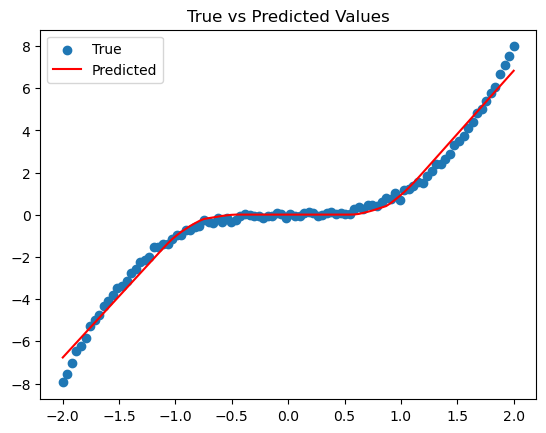

In [2]:
# Plot predictions
plt.scatter(X, y_true, label="True")
plt.plot(X, predictions, color='red', label="Predicted")
plt.title("True vs Predicted Values")
plt.legend()
plt.show()

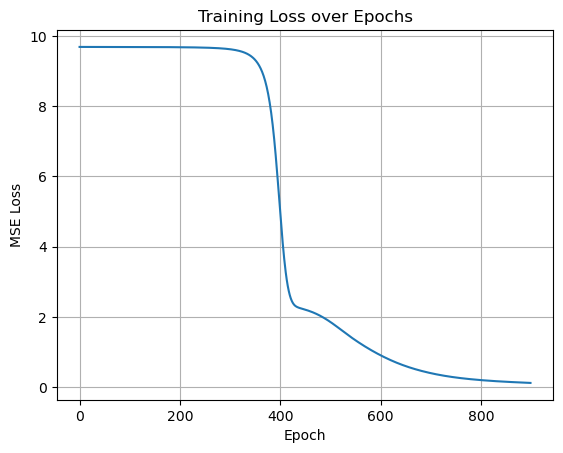

In [3]:
# Plot loss curve
plt.plot(loss_history)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid()
plt.show()

In [4]:
# Calculate R² Score
y_mean = np.mean(y_true)
ss_res = np.sum((predictions - y_true)**2)
ss_tot = np.sum((y_true - y_mean)**2)
r2_score = 1 - (ss_res / ss_tot)

print(f"📊 Final R² Score: {r2_score:.4f}")

📊 Final R² Score: 0.9872
